### Implement Edge Detection

Write a Python function using OpenCV that takes an image file path as input, applies Canny edge detection on the image, and displays the original and edge-detected images side by side.

In [3]:
import cv2 as cv
import numpy as np
import matplotlib.pyplot as pl

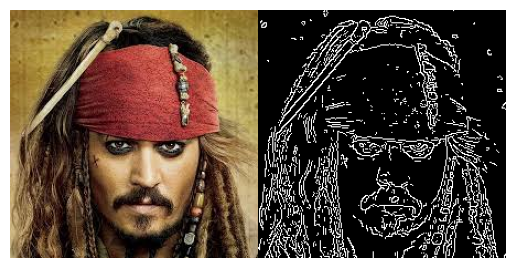

In [2]:
img = cv.imread(r"C:\Users\IK\Desktop\VisionCraft-TheWinter-Challenge\WEEK 3\js.jpeg")
img = cv.cvtColor(img, cv.COLOR_BGR2RGB)
gray = cv.cvtColor(img, cv.COLOR_RGB2GRAY)
edges = cv.Canny(gray,200,160)
both = np.hstack((img, cv.cvtColor(edges, cv.COLOR_GRAY2RGB))) 
pl.imshow(both)
pl.axis('off')
pl.show()

### Face and Eye Detection

Create a function that detects faces and eyes in a given image using Haar cascades in OpenCV. The function should draw rectangles around detected faces and eyes and display the output image.

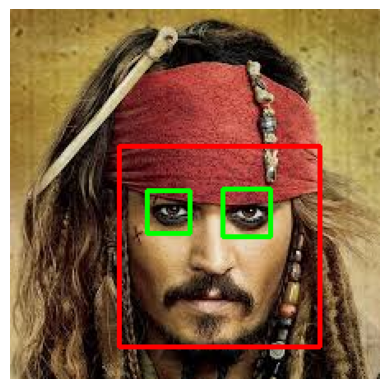

In [3]:
def face_eye(img, gray):
    face_cascade = cv.CascadeClassifier(cv.data.haarcascades + 'haarcascade_frontalface_default.xml')
    eye_cascade = cv.CascadeClassifier(cv.data.haarcascades + 'haarcascade_eye.xml')

    faces = face_cascade.detectMultiScale(gray, scaleFactor=1.3, minNeighbors=5)

    (x,y,w,h) = faces[0]
    cv.rectangle(img, (x, y), (x + w, y + h), (255, 0, 0), 2)
    roi_gray = gray[y:y + h, x:x + w]
    roi_color = img[y:y + h, x:x + w]

    eyes = eye_cascade.detectMultiScale(roi_gray)
    for (ex, ey, ew, eh) in eyes:
            cv.rectangle(roi_color, (ex, ey), (ex + ew, ey + eh), (0, 255, 0), 2)

    pl.imshow(img)
    pl.axis('off')  
    pl.show()


 
face_eye(img.copy(),gray)


###Image Cropping Based on Facial Features

Write a function that takes an image path as input and detects faces. If exactly one face is detected, return the cropped image of the face. Use Haar cascades for face detection.

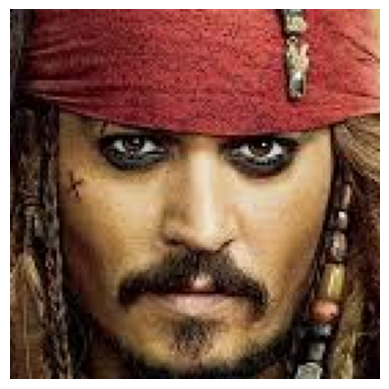

In [4]:
def face_only(img,gray):
    face_cascade = cv.CascadeClassifier(cv.data.haarcascades + 'haarcascade_frontalface_default.xml')
    faces = face_cascade.detectMultiScale(gray, scaleFactor=1.1, minNeighbors=5)
    if len(faces)==1:
        (x,y,w,h) = faces[0]
        crop = img[y:y+h,x:x+w]
    return crop

cropped_image = face_only(img.copy(),gray)
pl.imshow(cropped_image)
pl.axis('off')
pl.show()



### Feature Matching with ORB
Create a Python script that uses ORB to detect and match features between two images. The script should display the matched keypoints on the output image.

In [5]:
import cv2 as cv
import numpy as np

def feature_matching_with_orb(img1, img2):

    # Step 2: Convert to grayscale
    gray1 = cv.cvtColor(img1, cv.COLOR_BGR2GRAY)
    gray2 = cv.cvtColor(img2, cv.COLOR_BGR2GRAY)

    # Step 3: Initialize ORB detector
    orb = cv.ORB_create()

    # Step 4: Detect keypoints and descriptors in both images
    kp1, des1 = orb.detectAndCompute(gray1, None)
    kp2, des2 = orb.detectAndCompute(gray2, None)

    # Step 5: Create a Brute-Force Matcher and match the descriptors
    bf = cv.BFMatcher(cv.NORM_HAMMING, crossCheck=True)
    matches = bf.match(des1, des2)

    # Step 6: Sort the matches by distance (lower distance is better)
    matches = sorted(matches, key=lambda x: x.distance)

    # Step 7: Draw the first 50 matches
    img_matches = cv.drawMatches(img1, kp1, img2, kp2, matches[:50], None, flags=cv.DrawMatchesFlags_NOT_DRAW_SINGLE_POINTS)

    # Step 8: Display the output image
    cv.imshow("ORB Feature Matching", img_matches)
    cv.waitKey(0)
    cv.destroyAllWindows()
img1 = cv.imread(r"C:\Users\IK\Desktop\VisionCraft-TheWinter-Challenge\WEEK 3\js.jpeg")
img2 = cv.imread(r"C:\Users\IK\Desktop\VisionCraft-TheWinter-Challenge\WEEK 3\js.jpg")
feature_matching_with_orb(img1,img2)


### Applying Gaussian Blur for Noise Reduction
Write a function that applies a Gaussian blur to an image to reduce noise and displays both the original and blurred images.

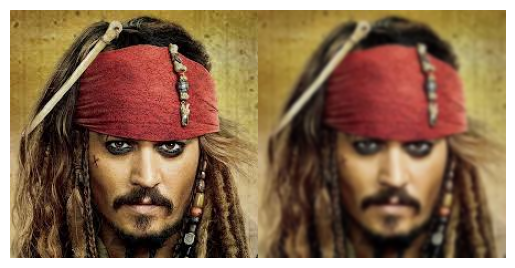

In [6]:
def blurring(img):
    img_blur = cv.GaussianBlur(img, (7,7),0)
    both = np.hstack((img, img_blur))
    pl.imshow(both)
    pl.axis('off')
    pl.show()
blurring(img)

### Pyramid Transform for Image Scaling
Create a function that creates a pyramid of images (both up and down) for a given image and displays the results.

In [7]:
def pyramid(img):
    lower_res = cv.pyrDown(img)
    higher_res = cv.pyrUp(img)

    cv.imshow('Original Image', img)
    cv.imshow('Lower Resolution', lower_res)
    cv.imshow('Higher Resolution', higher_res)
    cv.waitKey(0)
pyramid(img)
    

### Implement Harris Corner Detection in Python
Write a Python function using OpenCV that takes an image file as input and applies the Harris Corner Detection algorithm. Your function should display the original image with the detected corners marked. Include parameters to specify the block size, ksize, and free parameter for flexibility.

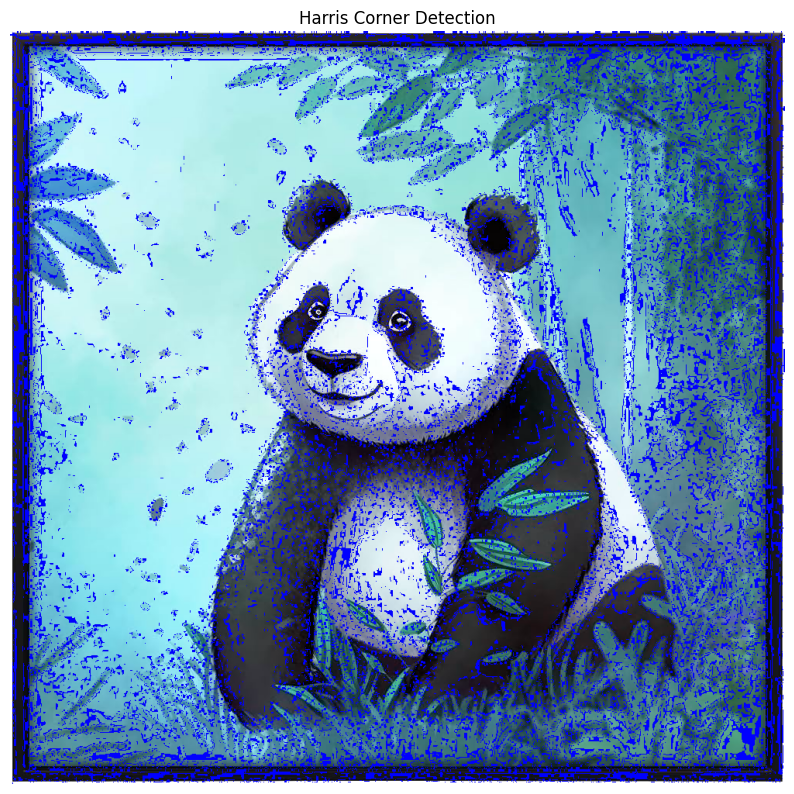

In [17]:

def harris_corner(img, block_size=2, ksize=3, k=0.04, threshold=0.01):
    gray = cv.cvtColor(img3, cv.COLOR_BGR2GRAY)
    gray = np.float32(gray)
    dst = cv.cornerHarris(gray, block_size, ksize, k)

    dst = cv.dilate(dst, None)
    dst = np.uint8(dst)
    
    img[dst > threshold * dst.max()] = [0, 0, 255]  
    
    pl.figure(figsize=(10, 10))
    pl.imshow(img)  # Convert BGR to RGB for matplotlib
    pl.title("Harris Corner Detection")
    pl.axis('off')  # Hide axes
    pl.show()
img3 = cv.imread(r"C:\Users\IK\Desktop\VisionCraft-TheWinter-Challenge\WEEK 3\p.jpg")
harris_corner(img3,block_size=2, ksize=3, k=0.1, threshold=0.8)


### SIFT Keypoint Detection and Description
Create a function that reads an image, converts it to grayscale, and then applies the SIFT algorithm to detect keypoints and compute descriptors. Ensure the detected keypoints are visualized on the original image.

In [21]:
def sift(img):
    gray = cv.cvtColor(img, cv.COLOR_BGR2GRAY)

    sift = cv.SIFT_create()
    keypoints, descriptors = sift.detectAndCompute(gray, None)

    result = cv.drawKeypoints(img, keypoints, None)
    cv.imshow("SIFT", result)
    cv.waitKey(0)
sift(img3)

### Feature Matching using ORB
Develop a Python script that matches features between two images using the ORB algorithm. The script should display the matched features between the two images with lines connecting corresponding keypoints.

In [22]:
import cv2 as cv
import numpy as np

def feature_matching_with_orb(img1, img2):

    # Step 2: Convert to grayscale
    gray1 = cv.cvtColor(img1, cv.COLOR_BGR2GRAY)
    gray2 = cv.cvtColor(img2, cv.COLOR_BGR2GRAY)

    # Step 3: Initialize ORB detector
    orb = cv.ORB_create()

    # Step 4: Detect keypoints and descriptors in both images
    kp1, des1 = orb.detectAndCompute(gray1, None)
    kp2, des2 = orb.detectAndCompute(gray2, None)

    # Step 5: Create a Brute-Force Matcher and match the descriptors
    bf = cv.BFMatcher(cv.NORM_HAMMING, crossCheck=True)
    matches = bf.match(des1, des2)

    # Step 6: Sort the matches by distance (lower distance is better)
    matches = sorted(matches, key=lambda x: x.distance)

    # Step 7: Draw the first 50 matches
    img_matches = cv.drawMatches(img1, kp1, img2, kp2, matches[:50], None, flags=cv.DrawMatchesFlags_NOT_DRAW_SINGLE_POINTS)

    # Step 8: Display the output image
    cv.imshow("ORB Feature Matching", img_matches)
    cv.waitKey(0)
    cv.destroyAllWindows()
img1 = cv.imread(r"C:\Users\IK\Desktop\VisionCraft-TheWinter-Challenge\WEEK 3\js.jpeg")
img2 = cv.imread(r"C:\Users\IK\Desktop\VisionCraft-TheWinter-Challenge\WEEK 3\js.jpg")
feature_matching_with_orb(img1,img2)


### Implement FAST Corner Detection
Write a Python function to implement the FAST corner detection algorithm. The function should accept an image and return the image with detected keypoints highlighted.

In [24]:
def fast(image):
    fast = cv.FastFeatureDetector_create()

    keypoints = fast.detect(image, None)
    result = cv.drawKeypoints(image, keypoints, None, color=(255, 0, 0))
    cv.imshow("Fast_Corner_Detected", result)
    cv.waitKey(0)
fast(img3)

Tough questions

### Custom Canny Edge Detector Implementation
Implement your own version of the Canny edge detection algorithm from scratch using Python (without using OpenCV functions). Your implementation should include:

Gaussian filtering for noise reduction.
Calculation of gradient magnitude and direction.
Non-maximum suppression.
Hysteresis thresholding. Your function should take an image as input and return an image with detected edges.

In [ ]:
# Write Your code here.

### Multi-Scale Feature Detection
Create a function that applies multi-scale feature detection using the Laplacian of Gaussian (LoG) method. This function should take an image and a list of sigma values as input, and return an image or set of images showing detected features at the different scales.

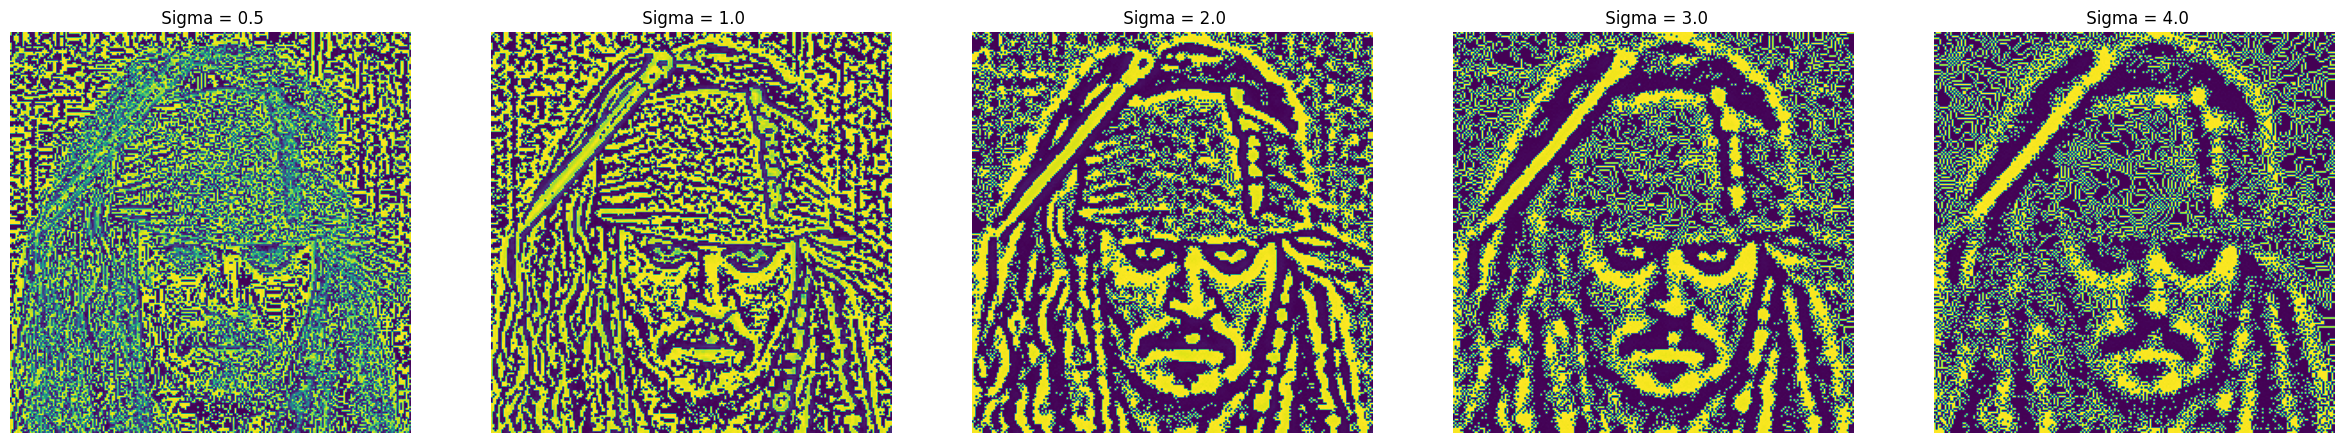

In [8]:
from scipy.ndimage import convolve, gaussian_filter

def laplacian_of_gaussian(image, sigma):
    blurred_image = gaussian_filter(image, sigma=sigma)
    laplacian = convolve(blurred_image, np.array([[0, 1, 0], [1, -4, 1], [0, 1, 0]]))
    return laplacian

def multi_scale_feature_detection(image, sigma_values):
    detected_features = []  
    for sigma in sigma_values:
        log_image = laplacian_of_gaussian(image, sigma)
        detected_features.append(log_image)  
    return detected_features

if __name__ == "__main__":
    image = cv.imread(r"C:\Users\IK\Desktop\VisionCraft-TheWinter-Challenge\WEEK 3\js.jpeg")
    image_gray = cv.cvtColor(image, cv.COLOR_BGR2GRAY)  
    sigma_values = [0.5, 1.0, 2.0, 3.0, 4.0]
    detected_features = multi_scale_feature_detection(image_gray, sigma_values)

    fig, axes = pl.subplots(1, len(sigma_values), figsize=(30, 10))
    for i, sigma in enumerate(sigma_values):
        axes[i].imshow(detected_features[i])
        axes[i].set_title(f" Sigma = {sigma}")
        axes[i].axis('off')
    
    pl.show()


## Bonus Question

Do your Research on how can we make a 3d model from the Refined frames.  

In [ ]:
# # What I understood is that there are many steps involved in this process.
# 1) 2D FRAMES=          This is basically what we have done till yet. Through many libraries such as ORB, FAST, SIFT, we tend to find out the main features from the image i.e. 
#                        the corners, edges, and where intensity of images change leading to the the facial descriptions such as the eyes and face.
# 2) CHECKING THE CAMERA= So this basically checks how the 2D image clicked was related to the actual 3D scenario, i.e. the angles and all. It kind of involves 2 basic steps
#                          which I could understand... They are the Intrinsic and Extrinsic factors. 
#                          a) The Intrinsic factors are related to the properties of the camera such as the focal length.
#                          b) The External factors are related to the camera's position and orientation relative to the 3D world.

# 3) HANDLING THE 3D COORDINATES= This basically is nothing but estimating the depth of each feature in the 2D map in the 3D space. The main two things that can be used to find
#                               this are Stereo-Vision and SFMs. From this we will be able to get the coordinates of each point in 3D.

# 4) MAKING A ROUGH 3D CLOUD=  Next these points are plotted in the 3D space to form a collection of points which we call as the 3D point cloud.

# 5) SURFACE RECONSTRUCTION= After this raw 3D structure we have generated, we start refining it more. This is done by various algorithms such as Poisson Surface Reconstruction.
#                            This method assumes that the point cloud represents the surface of the object. 
#                             It constructs a mesh that best fits the point cloud while smoothing out noise.

